# Εργασία στο Μάθημα Αναγνώριση Προτύπων - Μέρη Α, Β, Γ
## Ονοματεπώνυμα Φοιτητών:
 

### Μέρος Α

In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split

data = pd.read_csv(r"D:\projects\Pattern-Recognition\dataset.csv")
print(f'The data is : {data}')


X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape


      1.8036  4.4229  3
0    3.46150  4.1436  2
1    2.18730  3.9964  1
2    3.09330  2.9056  1
3    1.75860  2.4109  1
4    1.39350  3.3955  3
..       ...     ... ..
274 -0.94428 -1.1722  1
275  1.21990  6.0341  3
276  0.91094  1.1120  1
277  6.24770  4.5430  1
278  3.10060  6.8385  1

[279 rows x 3 columns]
(139, 2)
(140, 2)
(139,)
(140,)


      1.8036  4.4229  3
0    3.46150  4.1436  2
1    2.18730  3.9964  1
2    3.09330  2.9056  1
3    1.75860  2.4109  1
4    1.39350  3.3955  3
..       ...     ... ..
274 -0.94428 -1.1722  1
275  1.21990  6.0341  3
276  0.91094  1.1120  1
277  6.24770  4.5430  1
278  3.10060  6.8385  1

[279 rows x 3 columns]
0.8142857142857143


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


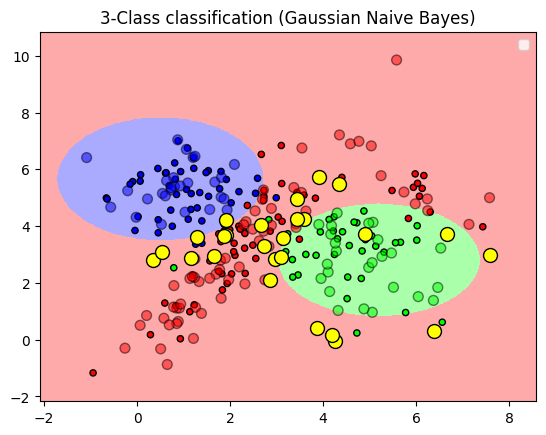

In [14]:
from sklearn.naive_bayes import GaussianNB
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Load the data again due to the reset state
data = pd.read_csv(r"D:\projects\Pattern-Recognition\dataset.csv")
print(data)

# Splitting data into features (X) and labels (y)
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

# Splitting the dataset into training and test sets with a 50-50 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

# Initialize Gaussian Naive Bayes classifier
gnb = GaussianNB()

# Train the classifier with the training data
gnb.fit(X_train, y_train)

# Calculate the average covariance matrix across all classes
avg_covariance = np.mean(gnb.var_, axis=0)

# Set the covariance of each class to the average covariance matrix
gnb.sigma_ = np.array([avg_covariance] * len(gnb.classes_))

# Now, let's test the classifier accuracy on the test set
accuracy = gnb.score(X_test, y_test)
print(accuracy)

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import numpy as np

# Since GaussianNB can't set the same covariance matrix, we'll proceed with visualizing the test data and decision boundaries
# Train a new GaussianNB classifier
gnb = GaussianNB()
gnb.fit(X_train, y_train)

# Predict the test set results
y_pred = gnb.predict(X_test)

# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

# We will assign a color to each point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
h = .02  # step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = gnb.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot also the training points
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cmap_bold, edgecolor='k', s=20)
# and testing points
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred, cmap=cmap_bold, alpha=0.5, edgecolor='k', s=50)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("3-Class classification (Gaussian Naive Bayes)")

# Mark the test points that were incorrectly classified
for i in range(len(X_test)):
    if y_pred[i] != y_test[i]:
        plt.scatter(X_test[i, 0], X_test[i, 1], color='yellow', edgecolor='k', s=100, label="Misclassified" if i == 0 else "")

plt.legend()
plt.show()